#### Implementation of multistep Monte Carlo simulation (Implemented as a part of a 2-day workshop by IIQF - Indian Institute of Quantitative Finance)

In [1]:
import numpy as np 
import math as m 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Function to get simulated prices
# RiskFreeRate : Expected return of Stock
def simulated_prices(StockPrice, RiskFreeRate, Volatility, NumberOfSteps, TimetoMaturity):
    NumberOfSimulations = 100
    SimulatedSteps      = NumberOfSteps*TimetoMaturity
    
    #Define dt 
    dt = 1/NumberOfSteps
    
    #Define Drift and Standard Deviation of Stock to implement GBM
    
    Drift = (RiskFreeRate - 0.5*Volatility*Volatility) * dt
    Sigmadt = Volatility * m.sqrt(dt)
    
    #Getting the price of stock St for time t
    StockPricet = np.zeros(shape=(SimulatedSteps, NumberOfSimulations))
    StockPricet[0,] = StockPrice
    
    #Implementing the loop to iterate for price as stock
    for i in range(1, SimulatedSteps):
        for j in range(0, NumberOfSimulations):
            StandardNormalDistribution = np.random.randn()
            StockPricet[i,j]=StockPricet[[i-1],j]*m.exp(Drift + Sigmadt* StandardNormalDistribution)
            
    return StockPricet 

In [3]:
prices = simulated_prices(100, 0.1, 0.07, 4, 22)

In [4]:
m = pd.DataFrame(prices)

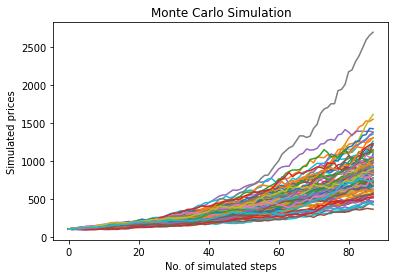

In [5]:
plt.plot(m)
plt.title('Monte Carlo Simulation')
plt.xlabel('No. of simulated steps')
plt.ylabel('Simulated prices')
plt.show()